# **Flight Delay Prediction using Scikit-Learn Pipeline**

## **Overview**
This project demonstrates how to build a **machine learning pipeline** using scikit-learn to predict flight delays. The pipeline integrates data preprocessing with model training, ensuring efficient handling of both numerical and categorical data.

---

## **Objectives**
- Preprocess numerical and categorical data using `ColumnTransformer`.
- Automate the machine learning workflow using `Pipeline`.
- Train a **Random Forest Classifier** to predict flight delays.
- Optimize the model using **GridSearchCV** for hyperparameter tuning.

---

## **Data Overview**
- **Dataset**: Contains flight details such as:
  - **Year**, **Month**, **Day**
  - **Airline code**, **Origin airport code**, **Destination airport code**
  - **Departure delay** (target: delayed or not)

- **Target Variable**:  
  - `1` if the flight was delayed  
  - `0` if the flight was on time

---

## **Steps Involved**

### 1. **Data Loading and Exploration**
- Load the flight dataset and inspect its structure and missing values.

### 2. **Feature Engineering**
- **Numerical Features**:
  - `YEAR`, `MONTH`, `DAY`
- **Categorical Features**:
  - `AIRLINE__CODE`, `ORIGIN_AIRPORT_CODE`, `DESTINATION_AIRPORT_CODE`

### 3. **Preprocessing with `ColumnTransformer`**
- **Numerical Data**:
  - Impute missing values with the **mean**.
  - Standardize values using **`StandardScaler`**.
  
- **Categorical Data**:
  - Impute missing values with `'missing'`.
  - Encode using **`OneHotEncoder`**.

### 4. **Pipeline Setup**
- Use a **scikit-learn Pipeline** to link preprocessing and model training.
- Integrate a **Random Forest Classifier** within the pipeline.

### 5. **Model Training and Evaluation**
- Split the data into **train (70%)** and **test (30%)** sets.
- Evaluate the model using a **classification report** with metrics like:
  - **Precision**, **Recall**, **F1-score**

### 6. **Hyperparameter Tuning with GridSearchCV**
- Tune hyperparameters of the Random Forest model:
  - Number of estimators (`n_estimators`)
  - Maximum tree depth (`max_depth`)

### 7. **Model Persistence**
- Save the trained model using **`joblib`** for later use.

---

## **Technologies Used**
- **Python**: Programming language
- **Pandas**: Data manipulation and cleaning
- **Scikit-Learn**: Machine learning, preprocessing, and model evaluation
- **Joblib**: Model persistence
- **Jupyter Notebook**: Interactive development environment

---

## **Expected Output**
- A **trained Random Forest model** to predict flight delays.
- **Performance metrics** (accuracy, precision, recall) from the classification report.
- A **saved model** (`flight_delay_classifier.pkl`) for deployment.

---

## **Conclusion**
This project demonstrates how to create an automated **machine learning workflow** using scikit-learn’s `Pipeline` and `ColumnTransformer`. The streamlined preprocessing ensures consistency during both training and testing. With **hyperparameter tuning**, the model's performance is further optimized, making it reliable for real-world flight delay predictions.


# Upgrade pip and install all required packages

In [ ]:
!pip install --upgrade pip

# Install Snowflake connectors, pandas integration, and essential libraries
!pip install "snowflake-connector-python[pandas]" \
             snowflake-snowpark-python==1.12.0,<2,>=1.11.1 \
             python-dateutil tqdm holidays faker
!pip install numpy pandas matplotlib scikit-learn xgboost seaborn \

# Ensure Snowpark Python is up-to-date
!pip install --upgrade -q snowflake-snowpark-python==1.12.0,<2,>=1.11.1


# Fix potential urllib3 version conflicts
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15

# Additional installations for your project
!pip install fosforml==1.1.6
!pip install python-scipy
!pip install cloudpickle==2.2.1
!pip install basemap


# Importing necessary libraries and settings

In [1]:

# Standard libraries for date and warnings
import datetime
import warnings

# Scientific and Data Manipulation Libraries
import scipy
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# Sklearn Modules for Data Preprocessing, Modeling, and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables
from sklearn.preprocessing import StandardScaler  # Scaling numerical data
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.metrics import roc_auc_score, classification_report  # Evaluation metrics

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

import configparser
from dateutil.relativedelta import relativedelta
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Configuring display options and warning filters
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")

# Custom FosforML package for Snowflake session and model registration
from fosforml.model_manager.snowflakesession import get_session
from fosforml import register_model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [2]:
# Set Matplotlib's default font family to 'DeJavu Serif' to ensure a consistent font style across plots
plt.rcParams['font.family'] = 'DeJavu Serif'

# Establishing a Snowflake session


In [3]:
my_session = get_session()

# Defining the table name to fetch data from
# table_name = 'FLIGHTS'  # Initial option for table
table_name = 'FLIGHTS_FULL'  # Final table to be used

# Querying the data from the specified Snowflake table
sf_df = my_session.sql("SELECT * FROM {}".format(table_name))

# Converting the Snowflake DataFrame to a pandas DataFrame for local processing
df = sf_df.to_pandas()

df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
0,2024,7,9,4,OO,5625,N971SW,SFO,BFL,1551,1541.0,-10.0,30.0,1611.0,77.0,81.0,45.0,238,1656.0,6.0,1708,1702.0,-6.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Skywest Airlines Inc.,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,Meadows Field,Bakersfield,CA,USA,35.43360,-119.05677
1,2024,7,9,4,AA,2421,N5EPAA,STT,MIA,1552,1548.0,-4.0,10.0,1558.0,173.0,164.0,145.0,1107,1823.0,9.0,1845,1832.0,-13.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,American Airlines Inc.,Cyril E. King Airport,Charlotte Amalie,VI,USA,18.33731,-64.97336,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
2,2024,7,9,4,DL,766,N752AT,DTW,SAN,1552,1638.0,46.0,18.0,1656.0,278.0,275.0,253.0,1956,1809.0,4.0,1730,1813.0,43.0,0,0,None,0.0,0.0,43.0,0.0,0.0,2024-07-09,Delta Air Lines Inc.,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966
3,2024,7,9,4,UA,809,N476UA,SNA,DEN,1552,1549.0,-3.0,12.0,1601.0,138.0,154.0,133.0,846,1914.0,9.0,1910,1923.0,13.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,United Air Lines Inc.,John Wayne Airport (Orange County Airport),Santa Ana,CA,USA,33.67566,-117.86822,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
4,2024,7,9,4,UA,1925,N73270,FLL,DEN,1552,1631.0,39.0,15.0,1646.0,257.0,NaN,NaN,1703,2120.0,9.0,1809,2129.0,NaN,1,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,United Air Lines Inc.,Fort Lauderdale-Hollywood International Airport,Ft. Lauderdale,FL,USA,26.07258,-80.15275,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2024,7,9,4,OO,6477,N117SY,ORD,DFW,1551,1548.0,-3.0,19.0,1607.0,149.0,175.0,145.0,802,1832.0,11.0,1820,1843.0,23.0,0,0,None,23.0,0.0,0.0,0.0,0.0,2024-07-09,Skywest Airlines Inc.,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
5819075,2024,7,9,4,OO,6498,N110SY,BOI,LAX,1551,1610.0,19.0,12.0,1622.0,139.0,126.0,103.0,674,1705.0,11.0,1710,1716.0,6.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Skywest Airlines Inc.,Boise Airport (Boise Air Terminal),Boise,ID,USA,43.56444,-116.22278,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
5819076,2024,7,9,4,EV,2675,N908EV,JAN,DFW,1551,1550.0,-1.0,10.0,1600.0,94.0,94.0,70.0,408,1710.0,14.0,1725,1724.0,-1.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Atlantic Southeast Airlines,Jackson-Evers International Airport,Jackson,MS,USA,32.31117,-90.07589,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,32.89595,-97.03720
5819077,2024,7,9,4,EV,5135,N759EV,RST,MSP,1551,1548.0,-3.0,24.0,1612.0,46.0,56.0,25.0,76,1637.0,7.0,1637,1644.0,7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Atlantic Southeast Airlines,Rochester International Airport,Rochester,MN,USA,43.90883,-92.49799,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,44.88055,-93.21692


# Filtering data for specific airlines

In [4]:
# Defining the list of airlines to include in the filtered DataFrame
#options = ['Southwest Airlines Co.', 'Delta Air Lines Inc.']
options = ['Southwest Airlines Co.']
#df.replace({'AIRLINE':'Southwest Airlines Co.'}, {'AIRLINE': 'Southwest airlines'}, regex=True)
#df.replace({'AIRLINE':'Delta Air Lines Inc.'}, {'AIRLINE': 'Delta airlines'}, regex=True)

# Selecting rows where the 'AIRLINE' column matches one of the specified airlines
flights = df.loc[df['AIRLINE'].isin(options)]
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
37,2024,7,9,4,WN,213,N600WN,BWI,DTW,1555,1551.0,-4.0,42.0,1633.0,95.0,132.0,78.0,409,1751.0,12.0,1730,1803.0,33.0,0,0,None,33.0,0.0,0.0,0.0,0.0,2024-07-09,Southwest Airlines Co.,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884
38,2024,7,9,4,WN,497,N224WN,BWI,PVD,1555,1557.0,2.0,10.0,1607.0,75.0,68.0,52.0,327,1659.0,6.0,1710,1705.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820,Theodore Francis Green State Airport,Providence,RI,USA,41.72400,-71.42822
39,2024,7,9,4,WN,240,N566WN,CAK,LGA,1555,1615.0,20.0,10.0,1625.0,85.0,87.0,62.0,397,1727.0,15.0,1720,1742.0,22.0,0,0,None,22.0,0.0,0.0,0.0,0.0,2024-07-09,Southwest Airlines Co.,Akron-Canton Regional Airport,Akron,OH,USA,40.91631,-81.44247,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
40,2024,7,9,4,WN,896,N901WN,DCA,MDW,1555,1552.0,-3.0,18.0,1610.0,120.0,115.0,89.0,601,1639.0,8.0,1655,1647.0,-8.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772,Chicago Midway International Airport,Chicago,IL,USA,41.78598,-87.75242
41,2024,7,9,4,WN,4114,N764SW,DEN,BWI,1555,1612.0,17.0,9.0,1621.0,210.0,218.0,176.0,1491,2117.0,33.0,2125,2150.0,25.0,0,0,None,8.0,0.0,9.0,8.0,0.0,2024-07-09,Southwest Airlines Co.,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819053,2024,7,9,4,WN,245,N407WN,SMF,BUR,1550,1549.0,-1.0,9.0,1558.0,70.0,64.0,52.0,358,1650.0,3.0,1700,1653.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Sacramento International Airport,Sacramento,CA,USA,38.69542,-121.59077,Bob Hope Airport (Hollywood Burbank Airport),Burbank,CA,USA,34.20062,-118.35850
5819054,2024,7,9,4,WN,990,N759GS,SMF,ONT,1550,1628.0,38.0,6.0,1634.0,75.0,70.0,59.0,390,1733.0,5.0,1705,1738.0,33.0,0,0,None,0.0,0.0,2.0,31.0,0.0,2024-07-09,Southwest Airlines Co.,Sacramento International Airport,Sacramento,CA,USA,38.69542,-121.59077,Ontario International Airport,Ontario,CA,USA,34.05600,-117.60119
5819055,2024,7,9,4,WN,268,N266WN,SNA,OAK,1550,1546.0,-4.0,10.0,1556.0,80.0,81.0,65.0,371,1701.0,6.0,1710,1707.0,-3.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,John Wayne Airport (Orange County Airport),Santa Ana,CA,USA,33.67566,-117.86822,Oakland International Airport,Oakland,CA,USA,37.72129,-122.22072
5819056,2024,7,9,4,WN,2427,N270WN,STL,DCA,1550,1608.0,18.0,11.0,1619.0,115.0,137.0,121.0,719,1920.0,5.0,1845,1925.0,40.0,0,0,None,22.0,0.0,0.0,18.0,0.0,2024-07-09,Southwest Airlines Co.,St. Louis International Airport at Lambert Field,St Louis,MO,USA,38.74769,-90.35999,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772


In [5]:
flights = flights.dropna(subset = 'ARRIVAL_DELAY')

# Creating a copy of the filtered flights data

In [6]:
# This ensures that any modifications made to 'flights_needed_data' do not affect the original 'flights' DataFrame
flights_needed_data = flights.copy()

In [7]:
flights_needed_data.shape
#(2137736, 45)

(1242403, 45)

In [8]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242403 entries, 37 to 5819057
Data columns (total 45 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   YEAR                      1242403 non-null  int16  
 1   MONTH                     1242403 non-null  int8   
 2   DAY                       1242403 non-null  int8   
 3   DAY_OF_WEEK               1242403 non-null  int8   
 4   AIRLINE__CODE             1242403 non-null  object 
 5   FLIGHT_NUMBER             1242403 non-null  int16  
 6   TAIL_NUMBER               1242403 non-null  object 
 7   ORIGIN_AIRPORT_CODE       1242403 non-null  object 
 8   DESTINATION_AIRPORT_CODE  1242403 non-null  object 
 9   SCHEDULED_DEPARTURE       1242403 non-null  int16  
 10  DEPARTURE_TIME            1242403 non-null  float64
 11  DEPARTURE_DELAY           1242403 non-null  float64
 12  TAXI_OUT                  1242403 non-null  float64
 13  WHEELS_OFF                12424

In [9]:
flights_needed_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
37,2024,7,9,4,WN,213,N600WN,BWI,DTW,1555,1551.0,-4.0,42.0,1633.0,95.0,132.0,78.0,409,1751.0,12.0,1730,1803.0,33.0,0,0,None,33.0,0.0,0.0,0.0,0.0,2024-07-09,Southwest Airlines Co.,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884
38,2024,7,9,4,WN,497,N224WN,BWI,PVD,1555,1557.0,2.0,10.0,1607.0,75.0,68.0,52.0,327,1659.0,6.0,1710,1705.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820,Theodore Francis Green State Airport,Providence,RI,USA,41.72400,-71.42822
39,2024,7,9,4,WN,240,N566WN,CAK,LGA,1555,1615.0,20.0,10.0,1625.0,85.0,87.0,62.0,397,1727.0,15.0,1720,1742.0,22.0,0,0,None,22.0,0.0,0.0,0.0,0.0,2024-07-09,Southwest Airlines Co.,Akron-Canton Regional Airport,Akron,OH,USA,40.91631,-81.44247,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261
40,2024,7,9,4,WN,896,N901WN,DCA,MDW,1555,1552.0,-3.0,18.0,1610.0,120.0,115.0,89.0,601,1639.0,8.0,1655,1647.0,-8.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772,Chicago Midway International Airport,Chicago,IL,USA,41.78598,-87.75242
41,2024,7,9,4,WN,4114,N764SW,DEN,BWI,1555,1612.0,17.0,9.0,1621.0,210.0,218.0,176.0,1491,2117.0,33.0,2125,2150.0,25.0,0,0,None,8.0,0.0,9.0,8.0,0.0,2024-07-09,Southwest Airlines Co.,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820


# Function to categorize scheduled arrival times into time segments

In [10]:
def categorize_time(SCHEDULED_ARRIVAL):
    # Categorize based on scheduled arrival time in 24-hour format
    if 500 <= SCHEDULED_ARRIVAL < 800:
        return 'Early morning'
    elif 800 <= SCHEDULED_ARRIVAL < 1100:
        return 'Late morning'
    elif 1100 <= SCHEDULED_ARRIVAL < 1400:
        return 'Around noon'
    elif 1400 <= SCHEDULED_ARRIVAL < 1700:
        return 'Afternoon'
    elif 1700 <= SCHEDULED_ARRIVAL < 2000:
        return 'Evening'
    elif 2000 <= SCHEDULED_ARRIVAL < 2300:
        return 'Night'
    elif SCHEDULED_ARRIVAL >= 2300 or SCHEDULED_ARRIVAL < 200:
        return 'Late night'
    elif 200 <= SCHEDULED_ARRIVAL < 500:
        return 'Dawn'

# Apply categorize_time function to the 'SCHEDULED_ARRIVAL' column to create 'ARRIVAL_TIME_SEGMENT'
flights_needed_data['ARRIVAL_TIME_SEGMENT'] = flights_needed_data['SCHEDULED_ARRIVAL'].apply(categorize_time)


In [11]:
flights_needed_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE__CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,FLY_DATE,AIRLINE,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE,ARRIVAL_TIME_SEGMENT
37,2024,7,9,4,WN,213,N600WN,BWI,DTW,1555,1551.0,-4.0,42.0,1633.0,95.0,132.0,78.0,409,1751.0,12.0,1730,1803.0,33.0,0,0,None,33.0,0.0,0.0,0.0,0.0,2024-07-09,Southwest Airlines Co.,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884,Evening
38,2024,7,9,4,WN,497,N224WN,BWI,PVD,1555,1557.0,2.0,10.0,1607.0,75.0,68.0,52.0,327,1659.0,6.0,1710,1705.0,-5.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820,Theodore Francis Green State Airport,Providence,RI,USA,41.72400,-71.42822,Evening
39,2024,7,9,4,WN,240,N566WN,CAK,LGA,1555,1615.0,20.0,10.0,1625.0,85.0,87.0,62.0,397,1727.0,15.0,1720,1742.0,22.0,0,0,None,22.0,0.0,0.0,0.0,0.0,2024-07-09,Southwest Airlines Co.,Akron-Canton Regional Airport,Akron,OH,USA,40.91631,-81.44247,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261,Evening
40,2024,7,9,4,WN,896,N901WN,DCA,MDW,1555,1552.0,-3.0,18.0,1610.0,120.0,115.0,89.0,601,1639.0,8.0,1655,1647.0,-8.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772,Chicago Midway International Airport,Chicago,IL,USA,41.78598,-87.75242,Afternoon
41,2024,7,9,4,WN,4114,N764SW,DEN,BWI,1555,1612.0,17.0,9.0,1621.0,210.0,218.0,176.0,1491,2117.0,33.0,2125,2150.0,25.0,0,0,None,8.0,0.0,9.0,8.0,0.0,2024-07-09,Southwest Airlines Co.,Denver International Airport,Denver,CO,USA,39.85841,-104.66700,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819053,2024,7,9,4,WN,245,N407WN,SMF,BUR,1550,1549.0,-1.0,9.0,1558.0,70.0,64.0,52.0,358,1650.0,3.0,1700,1653.0,-7.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,Sacramento International Airport,Sacramento,CA,USA,38.69542,-121.59077,Bob Hope Airport (Hollywood Burbank Airport),Burbank,CA,USA,34.20062,-118.35850,Evening
5819054,2024,7,9,4,WN,990,N759GS,SMF,ONT,1550,1628.0,38.0,6.0,1634.0,75.0,70.0,59.0,390,1733.0,5.0,1705,1738.0,33.0,0,0,None,0.0,0.0,2.0,31.0,0.0,2024-07-09,Southwest Airlines Co.,Sacramento International Airport,Sacramento,CA,USA,38.69542,-121.59077,Ontario International Airport,Ontario,CA,USA,34.05600,-117.60119,Evening
5819055,2024,7,9,4,WN,268,N266WN,SNA,OAK,1550,1546.0,-4.0,10.0,1556.0,80.0,81.0,65.0,371,1701.0,6.0,1710,1707.0,-3.0,0,0,None,NaN,NaN,NaN,NaN,NaN,2024-07-09,Southwest Airlines Co.,John Wayne Airport (Orange County Airport),Santa Ana,CA,USA,33.67566,-117.86822,Oakland International Airport,Oakland,CA,USA,37.72129,-122.22072,Evening
5819056,2024,7,9,4,WN,2427,N270WN,STL,DCA,1550,1608.0,18.0,11.0,1619.0,115.0,137.0,121.0,719,1920.0,5.0,1845,1925.0,40.0,0,0,None,22.0,0.0,0.0,18.0,0.0,2024-07-09,Southwest Airlines Co.,St. Louis International Airport at Lambert Field,St Louis,MO,USA,38.74769,-90.35999,Ronald Reagan Washington National Airport,Arlington,VA,USA,38.85208,-77.03772,Evening


In [12]:
flights['AIRLINE__CODE'].unique()

array(['WN'], dtype=object)

In [13]:
flights_needed_data.value_counts('DIVERTED')

DIVERTED
0    1242403
Name: count, dtype: int64

In [14]:
flights_needed_data['FLIGHT_NUMBER'] = flights_needed_data['FLIGHT_NUMBER'].astype(str)

In [15]:
flights_needed_data['MONTH'] = flights_needed_data['MONTH'].astype(str)
flights_needed_data['DAY'] = flights_needed_data['DAY'].astype(str)
flights_needed_data['DAY_OF_WEEK'] = flights_needed_data['DAY_OF_WEEK'].astype(str)
flights_needed_data['DIVERTED'] = flights_needed_data['DIVERTED'].astype(str)
flights_needed_data['CANCELLED'] = flights_needed_data['CANCELLED'].astype(str)
flights_needed_data['CANCELLED'] = flights_needed_data['CANCELLED'].astype(str)

In [16]:
flights_needed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242403 entries, 37 to 5819057
Data columns (total 46 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   YEAR                      1242403 non-null  int16  
 1   MONTH                     1242403 non-null  object 
 2   DAY                       1242403 non-null  object 
 3   DAY_OF_WEEK               1242403 non-null  object 
 4   AIRLINE__CODE             1242403 non-null  object 
 5   FLIGHT_NUMBER             1242403 non-null  object 
 6   TAIL_NUMBER               1242403 non-null  object 
 7   ORIGIN_AIRPORT_CODE       1242403 non-null  object 
 8   DESTINATION_AIRPORT_CODE  1242403 non-null  object 
 9   SCHEDULED_DEPARTURE       1242403 non-null  int16  
 10  DEPARTURE_TIME            1242403 non-null  float64
 11  DEPARTURE_DELAY           1242403 non-null  float64
 12  TAXI_OUT                  1242403 non-null  float64
 13  WHEELS_OFF                12424

In [17]:
flights_needed_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE__CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT_CODE', 'DESTINATION_AIRPORT_CODE',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'FLY_DATE', 'AIRLINE',
       'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_COUNTRY',
       'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DEST_AIRPORT', 'DEST_CITY',
       'DEST_STATE', 'DEST_COUNTRY', 'DEST_LATITUDE', 'DEST_LONGITUDE',
       'ARRIVAL_TIME_SEGMENT'],
      dtype='object')

# identifying the categorical and numerical variables

In [18]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_cols)
print('\n\n')
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Numerical columns: ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE', 'DEST_LATITUDE', 'DEST_LONGITUDE']



Categorical columns: ['AIRLINE__CODE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT_CODE', 'DESTINATION_AIRPORT_CODE', 'CANCELLATION_REASON', 'FLY_DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_COUNTRY', 'DEST_AIRPORT', 'DEST_CITY', 'DEST_STATE', 'DEST_COUNTRY']


# Quantifying missing values

<Axes: >

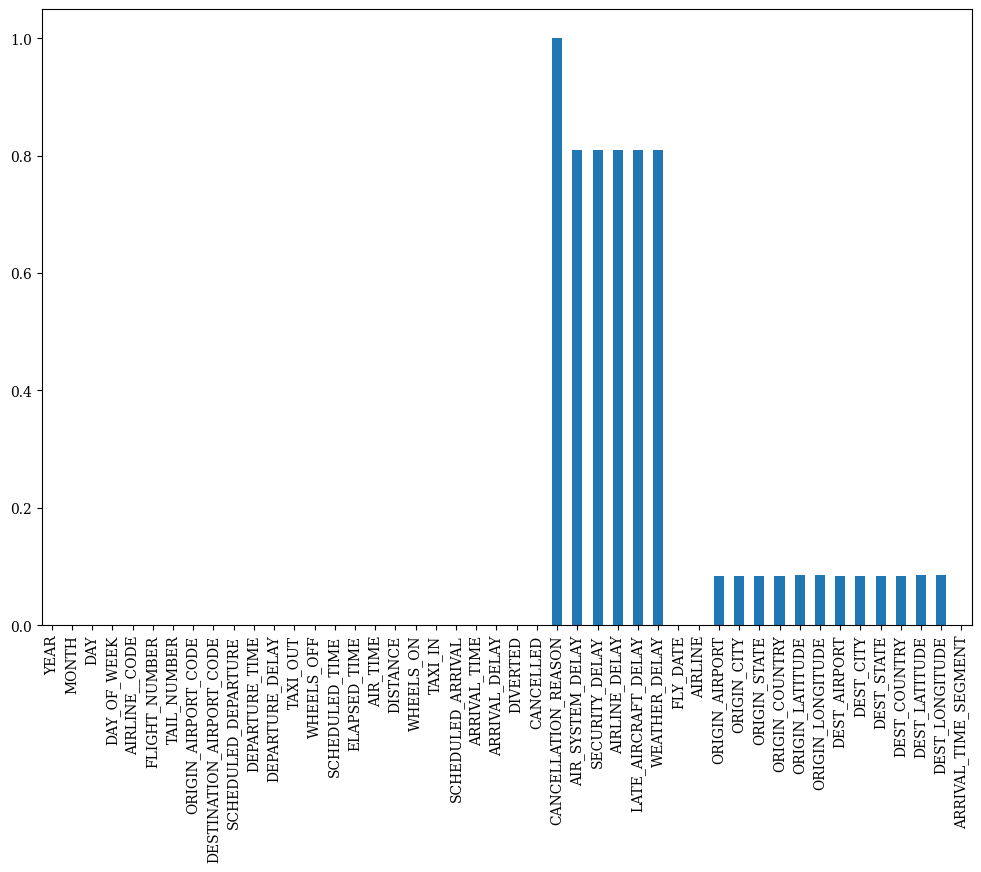

In [19]:
flights_needed_data.isnull().mean().plot.bar(figsize=(12, 8))

# Highlighting the Cardinality

In [20]:
flights_needed_data[categorical_cols].nunique()

AIRLINE__CODE                 1
TAIL_NUMBER                 704
ORIGIN_AIRPORT_CODE         172
DESTINATION_AIRPORT_CODE    172
CANCELLATION_REASON           0
FLY_DATE                    365
AIRLINE                       1
ORIGIN_AIRPORT               86
ORIGIN_CITY                  85
ORIGIN_STATE                 41
ORIGIN_COUNTRY                1
DEST_AIRPORT                 86
DEST_CITY                    85
DEST_STATE                   41
DEST_COUNTRY                  1
dtype: int64

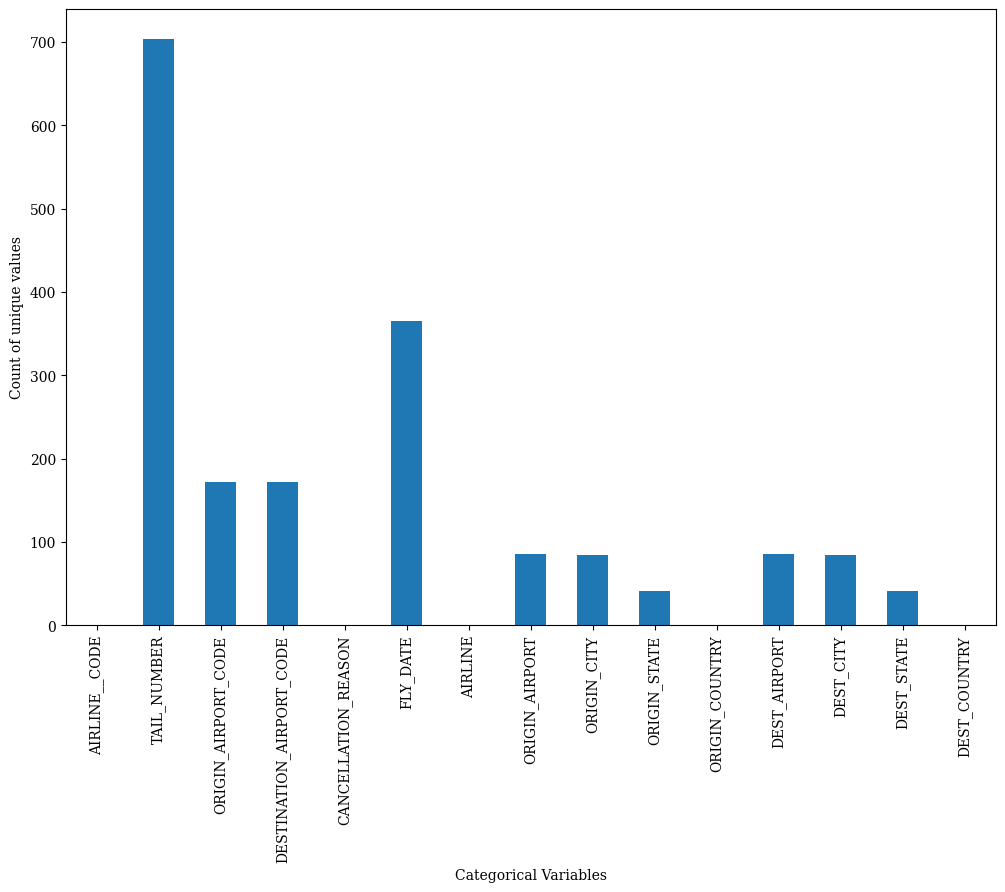

In [21]:
flights_needed_data[categorical_cols].nunique().plot.bar(figsize=(12, 8))
plt.xlabel("Categorical Variables")
plt.ylabel("Count of unique values")
plt.show()

# Correlations matrix

In [25]:
threshold = 0.05 * len(flights_needed_data)
for col in categorical_cols:
    counts = flights_needed_data[col].value_counts()
    rare_labels = counts[counts < threshold].index
    flights_needed_data[col] = flights_needed_data[col].replace(rare_labels, 'Other')


In [27]:
from scipy.stats import chi2_contingency

categorical_cols = [col for col in categorical_cols if flights_needed_data[col].nunique() < 50]

if 'FLY_DATE' in flights_needed_data.columns:
    flights_needed_data['FLY_MONTH'] = pd.to_datetime(flights_needed_data['FLY_DATE']).dt.month
    flights_needed_data['FLY_DAY_OF_WEEK'] = pd.to_datetime(flights_needed_data['FLY_DATE']).dt.dayofweek
    categorical_cols += ['FLY_MONTH', 'FLY_DAY_OF_WEEK']
    categorical_cols.remove('FLY_DATE')

flights_needed_data = flights_needed_data.dropna(subset=categorical_cols + ['ARRIVAL_DELAY'])

for col in categorical_cols:
    contingency_table = pd.crosstab(flights_needed_data[col], flights_needed_data['ARRIVAL_DELAY'])
    
    # Check that table is non-empty
    if contingency_table.size > 0:
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"Chi-square test for {col}: p-value = {p}")
    else:
        print(f"Skipping {col}: Contingency table is empty or too sparse")


ValueError: list.remove(x): x not in list

In [ ]:

corr_matrix = flights_needed_data.select_dtypes(include=['int', 'float']).corr()
arrival_delay_corr = corr_matrix['ARRIVAL_DELAY'].drop('ARRIVAL_DELAY').sort_values(ascending=False)
plt.figure(figsize=(10, 6))
arrival_delay_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation with Target Variable 'ARRIVAL_DELAY'")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()


In [ ]:
arrival_delay_corr[arrival_delay_corr > 0.2].index.tolist()

# Define columns by data type

# Creating the target column

In [ ]:
# result = []
# for row in flights_needed_data['ARRIVAL_DELAY']:
#   if row > 5:
#     result.append(1)
#   else:
#     result.append(0) 

# flights_needed_data['delay_flag'] = result
# flights_needed_data.value_counts('delay_flag')

In [ ]:
flights_needed_data['MONTH'] = flights_needed_data['MONTH'].astype(int)

In [ ]:
test_data = flights_needed_data[flights_needed_data['MONTH'] > 6] 
#test=test.drop(['FLY_DATE'], axis=1)
train_data = flights_needed_data[flights_needed_data['MONTH'] <= 6]

#train_data  = flights_needed_data[flights_needed_data["MONTH"].apply(lambda x: '11' not in x and '12' not in x)]
#test_data = flights_needed_data[flights_needed_data["MONTH"].apply(lambda x: '11' in x or '12' in x)]

In [ ]:
train_data.shape, test_data.shape

In [ ]:
test_data.info()

In [ ]:
# Replace 'target_column_name' with the actual name of your target column
X_train = train_data.drop(columns=['ARRIVAL_DELAY'])
y_train = train_data['ARRIVAL_DELAY']

# Replace 'target_column_name' with the actual name of your target column
X_test = test_data.drop(columns=['ARRIVAL_DELAY'])
y_test = test_data['ARRIVAL_DELAY']

In [ ]:
X_train.columns

In [ ]:
# numerical_cols = [ 'DISTANCE','AIR_TIME']                
# categorical_cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER','TAIL_NUMBER',
#                     'AIRLINE', 'ORIGIN_AIRPORT', 'ORIGIN_CITY', 'DEST_AIRPORT', 'DEST_CITY','ARRIVAL_TIME_SEGMENT']
# ## should add flytime if rerunning again

# Define transformations for numerical columns: imputing and scaling

In [ ]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define transformations for categorical columns: imputing and one-hot encoding


In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both transformations in a ColumnTransformer


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [ ]:
regressors = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'LinearRegression': LinearRegression(),
    'DecisionTree': DecisionTreeRegressor(),
    'KNeighbors': KNeighborsRegressor(),
    'SVR': SVR(),
    'GradientBoosting': GradientBoostingRegressor()
}

param_grid = {
    'RandomForest': {
        'regressor__n_estimators': [100, 200],
        'regressor__max_depth': [5, 10]
    },
    'XGBoost': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.1, 0.3],
        'regressor__max_depth': [3, 10],
        'regressor__subsample': [0.5, 1.0]
    },
    'Ridge': {
        'regressor__alpha': [1.0, 10.0, 100.0]
    },
    'Lasso': {
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    'ElasticNet': {
        'regressor__alpha': [0.1, 1.0, 10.0],
        'regressor__l1_ratio': [0.2, 0.5, 0.8]
    },
    'LinearRegression': {},  # No hyperparameters to tune
    'DecisionTree': {
        'regressor__max_depth': [5, 10, 15]
    },
    'KNeighbors': {
        'regressor__n_neighbors': [3, 5, 7]
    },
    'SVR': {
        'regressor__C': [0.1, 1.0, 10.0],
        'regressor__kernel': ['linear', 'rbf']
    },
    'GradientBoosting': {
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.1, 0.3],
        'regressor__max_depth': [3, 5]
    }
}

# Initialize variables to store the best model and score
best_model = None
best_score = float('-inf')
best_params = None

In [ ]:
for name, regressor in regressors.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Check if this model is the best so far
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    
    print(f"Model: {name}")
    print(f"Best R² score from cross-validation: {grid_search.best_score_}")
    print(f"Best parameters: {grid_search.best_params_}")
    print("")

# Output the best model and its parameters
print("Best model overall:")
print(best_model)
print(f"Best cross-validation R² score: {best_score}")
print(f"Best parameters: {best_params}")

# Evaluate on the test set
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Test set MSE: {test_mse}")
print(f"Test set R² score: {test_r2}")

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# pipeline.fit(X_train, y_train)

# y_train_pred = pipeline.predict(X_train)

# train_mse = mean_squared_error(y_train, y_train_pred)
# train_mae = mean_absolute_error(y_train, y_train_pred)
# train_r2 = r2_score(y_train, y_train_pred)

# print(f"Training MSE: {train_mse}")
# print(f"Training MAE: {train_mae}")
# print(f"Training R²: {train_r2}")


# y_test_pred = pipeline.predict(X_test)

# test_mse = mean_squared_error(y_test, y_test_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)
# test_r2 = r2_score(y_test, y_test_pred)

# print(f"Test MSE: {test_mse}")
# print(f"Test MAE: {test_mae}")
# print(f"Test R²: {test_r2}")


# mse_tolerance = 0.2 

# if train_mse < test_mse * (1 - mse_tolerance) and train_r2 > test_r2:
#     print("The model is likely overfitting.")
# elif train_mse > test_mse * (1 + mse_tolerance):
#     print("The model is likely underfitting.")
# else:
#     print("The model is likely generalizing well.")